Position   Visits   Relative Frequency
--------------------------------------
     -27        1   0.0100
     -26        4   0.0400
     -25        8   0.0800
     -24        7   0.0700
     -23        4   0.0400
     -22        3   0.0300
     -21        5   0.0500
     -20        7   0.0700
     -19        4   0.0400
     -18        4   0.0400
     -17        6   0.0600
     -16        6   0.0600
     -15        8   0.0800
     -14        7   0.0700
     -13        2   0.0200
     -12        2   0.0200
     -11        2   0.0200
     -10        1   0.0100
      -9        1   0.0100
      -8        2   0.0200
      -7        2   0.0200
      -6        1   0.0100
      -5        1   0.0100
      -4        2   0.0200
      -3        2   0.0200
      -2        2   0.0200
      -1        4   0.0400
       0        3   0.0300


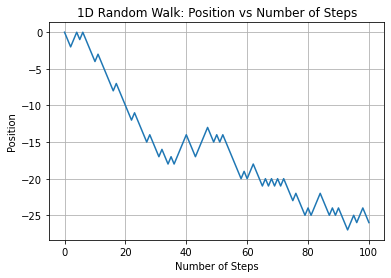

In [1]:
#One-Dimensional Unbiased Random Walk

import random
import matplotlib.pyplot as plt

N = 100
position = 0

visit_count = {}
visit_count[position] = 1

steps = [0]
positions = [position]

for step in range(1, N + 1):

    r = random.random()

    if r < 0.5:
        position -= 1
    else:
        position += 1

    steps.append(step)
    positions.append(position)

    if position in visit_count:
        visit_count[position] += 1
    else:
        visit_count[position] = 1

relative_frequency = {}
for pos in visit_count:
    relative_frequency[pos] = visit_count[pos] / N

print("Position   Visits   Relative Frequency")
print("--------------------------------------")
for pos in sorted(visit_count):
    print(f"{pos:8d}   {visit_count[pos]:6d}   {relative_frequency[pos]:.4f}")

plt.figure()
plt.plot(steps, positions)
plt.xlabel("Number of Steps")
plt.ylabel("Position")
plt.title("1D Random Walk: Position vs Number of Steps")
plt.grid(True)
plt.show()

Position     Visits     Relative Frequency
-------------------------------------------
  -60.00          2     0.0200
  -55.00          7     0.0700
  -50.00         12     0.1200
  -45.00         12     0.1200
  -40.00          7     0.0700
  -35.00          5     0.0500
  -30.00          4     0.0400
  -25.00          4     0.0400
  -20.00          6     0.0600
  -15.00          6     0.0600
  -10.00          8     0.0800
   -5.00          7     0.0700
    0.00          4     0.0400
    5.00          3     0.0300
   10.00          2     0.0200
   15.00          4     0.0400
   20.00          4     0.0400
   25.00          2     0.0200
   30.00          1     0.0100


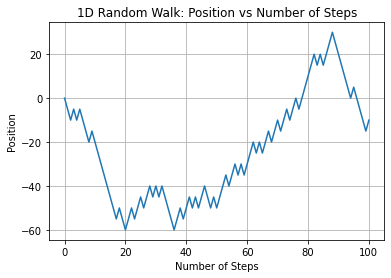

In [3]:
# One-Dimensional Random Walk with Jumps of Length l

import random
import matplotlib.pyplot as plt

N = 100
l = 5.0
position = 0.0
visit_count = {}
steps = [0]
positions = [position]

for step in range(1, N + 1):
    r = random.random()

    if r < 0.5:
        position -= l
    else:
        position += l

    steps.append(step)
    positions.append(position)

    if position in visit_count:
        visit_count[position] += 1
    else:
        visit_count[position] = 1

relative_frequency = {}
for pos in visit_count:
    relative_frequency[pos] = visit_count[pos] / N

print("Position     Visits     Relative Frequency")
print("-------------------------------------------")
for pos in sorted(visit_count):
    print(f"{pos:8.2f}     {visit_count[pos]:6d}     {relative_frequency[pos]:.4f}")

plt.figure()
plt.plot(steps, positions)
plt.xlabel("Number of Steps")
plt.ylabel("Position")
plt.title("1D Random Walk: Position vs Number of Steps")
plt.grid(True)
plt.show()

Final position of the walker: 477.2067706566678
Mean position: 237.2992689881453
Variance of position: 19795.712528662574


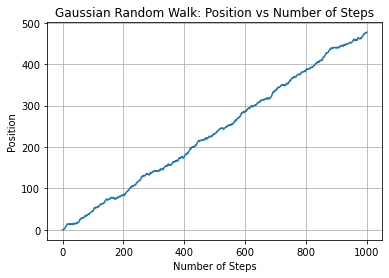

In [9]:
#Biased Random Walk(The walker takes steps based on a Gaussian distribution)

import numpy as np
import matplotlib.pyplot as plt

mu = 0.5
sigma = 1.0
N = 1000
position = 0.0
positions = [position]
steps = [0]

for i in range(1, N + 1):
    step = np.random.normal(mu, sigma)
    position += step
    positions.append(position)
    steps.append(i)

print("Final position of the walker:", position)
print("Mean position:", np.mean(positions))
print("Variance of position:", np.var(positions))

plt.figure()
plt.plot(steps, positions)
plt.xlabel("Number of Steps")
plt.ylabel("Position")
plt.title("Gaussian Random Walk: Position vs Number of Steps")
plt.grid(True)
plt.show()


Final position of the walker: 74
Mean position: 45.666333666333664
Variance of position: 591.2992561883672


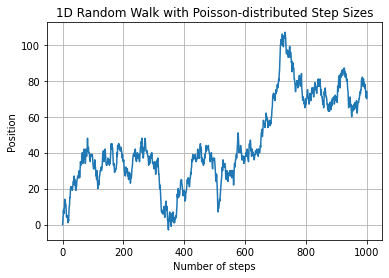

In [5]:
#Biased Random Walk(The walker takes steps based on a Poisson distribution)

import numpy as np
import matplotlib.pyplot as plt

num_steps = 1000
lam = 2.0
position = 0
positions = [position]

for i in range(num_steps):
    step_size = np.random.poisson(lam)
    direction = np.random.choice([-1, 1])
    position += direction * step_size
    positions.append(position)

positions = np.array(positions)

mean_position = np.mean(positions)
variance_position = np.var(positions)
final_position = positions[-1]

print("Final position of the walker:", final_position)
print("Mean position:", mean_position)
print("Variance of position:", variance_position)

plt.figure()
plt.plot(positions)
plt.xlabel("Number of steps")
plt.ylabel("Position")
plt.title("1D Random Walk with Poisson-distributed Step Sizes")
plt.grid(True)
plt.show()

pL = 0.26894142136999516
pR = 0.731058578630005
Final position: 476
Mean position: 252.37962037962038
Variance of position: 16829.658086169573


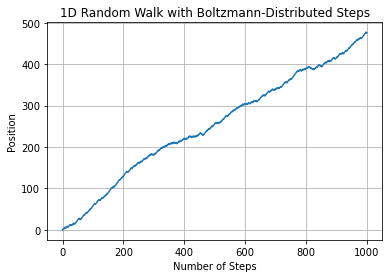

In [6]:
#Biased Random Walk(The walker takes steps based on a  Boltzmann distribution)

import numpy as np
import matplotlib.pyplot as plt

N = 1000        
beta = 0.5      

pL = np.exp(-beta) / (np.exp(-beta) + np.exp(beta))
pR = np.exp(beta) / (np.exp(-beta) + np.exp(beta))
position = 0
positions = [position]

for step in range(N):
    r = np.random.random()

    if r < pL:
        position -= 1  
    else:
        position += 1   
    positions.append(position)

positions = np.array(positions)

mean_position = np.mean(positions)
variance_position = np.var(positions)
final_position = positions[-1]

print("pL =", pL)
print("pR =", pR)
print("Final position:", final_position)
print("Mean position:", mean_position)
print("Variance of position:", variance_position)

plt.figure()
plt.plot(positions)
plt.xlabel("Number of Steps")
plt.ylabel("Position")
plt.title("1D Random Walk with Boltzmann-Distributed Steps")
plt.grid(True)
plt.show()

Final position:
x = -10 , y = 16
Mean x = -1.1468531468531469
Mean y = 1.2407592407592407
Variance x = 47.158254333079505
Variance y = 81.27370331965736


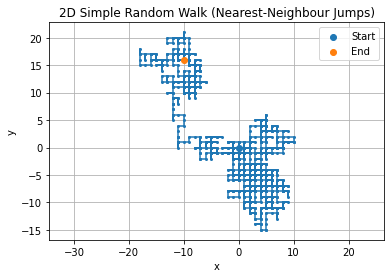

In [8]:
# A simple random walk in 2D where only NN jumps are allowed

import numpy as np
import matplotlib.pyplot as plt

N = 1000

x, y = 0, 0
x_positions = [x]
y_positions = [y]
moves = [(1, 0), (-1, 0), (0, 1), (0, -1)]

for step in range(N):
    dx, dy = moves[np.random.randint(4)]
    x += dx
    y += dy

    x_positions.append(x)
    y_positions.append(y)

x_positions = np.array(x_positions)
y_positions = np.array(y_positions)
final_x, final_y = x_positions[-1], y_positions[-1]

print("Final position:")
print("x =", final_x, ", y =", final_y)
print("Mean x =", np.mean(x_positions))
print("Mean y =", np.mean(y_positions))
print("Variance x =", np.var(x_positions))
print("Variance y =", np.var(y_positions))

plt.figure()
plt.plot(x_positions, y_positions, marker='o', markersize=2)
plt.scatter(0, 0, label="Start", zorder=3)
plt.scatter(final_x, final_y, label="End", zorder=3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Simple Random Walk (Nearest-Neighbour Jumps)")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()